# Sieci neuronowe
Na dzisiejszych laboratoriach przypomnimy sobie praktyczne aspekty związane z sieciami neuronowymi, które przerabialiśmy w poprzednim semestrze (SI). Ponieważ w dzisiejszych metodach przetwarzania tekstu sieci neuronowe są bardzo często wykorzystywane, a także, ponieważ na kolejnych laboratoriach skupimy się na zaawansowanych architekturach sieci neuronowych (RNN, LSTM, GRU) - dziś zaimplementujemy sieć neuronową bez użycia bibliotek!

Materiały wykładowe z SI znajdziecie pod adresem:  http://www.cs.put.poznan.pl/amichalski/wsi/AI8.ann.b&w.pdf

**Ponieważ nie mamy możliwości spotkać się przy tablicy, pozwolę sobie, zamiast przygotowywać statyczną prezentację, która nie odda dobrze tego, co w sieci się dzieje, wrzucić tutaj link do materiałów wideo, które w genialnie przystępny sposób wprowadzają w tematykę sieci neuronowych (https://www.youtube.com/watch?v=aircAruvnKk - swoją drogą polecam cały ten kanał). Obejrzenie tego około 20minutowego filmu zdecydowanie rozjaśni Wam tematykę sieci neuronowych. Wstęp jest co prawda na przykładzie obrazów, ale w tych laboratoriach chodzi o zrozumienie idei.**

**Uwaga: film zawiera pewne uproszczenie. W 10 minucie pokazany jest przykład funkcji aktywacji - tj. funkcji sigmoidalnej (sigmoidy) i powiedziane jest, że celem funkcji aktywacji jest osadzenie wartości neuronu w przedziale od 0 do 1. To jest częściowa prawda, można, ale nie trzeba osadzać wartości z neuronu w tym przedziale. **

**Bardzo często używa się innych funkcji aktywacji, które wcale nie są ograniczone do tego przedziału, np: tangens hiperboliczny (tanh) (-1 do 1), czy ReLU (od 0 do nieskonczoności). W ogólności funkcja aktywacji musi być funkcją nieliniową (dlaczego? bez nieliniowej funkcji aktywacji dowolnie duża sieć neuronowa nie wykorzysta warstw ukrytych, tu: https://www.coursera.org/lecture/neural-networks-deep-learning/why-do-you-need-non-linear-activation-functions-OASKH i tu: https://www.quora.com/Why-does-deep-learning-architectures-only-use-the-non-linear-activation-function-in-the-hidden-layers jest to dobrze wyjaśnione).**

**Zauważ, że pojedynczy neuron z aktywacją sigmoidalną jest tożsamy z regresją logistyczną z naszych drugich laboratoriów (!).**

**Ostatnia warstwa sieci neuronowej w problemach klasyfikacji jest najczęściej warstwą z aktywacją typu softmax. Neurony na wyjściu przyjmują wartości między zerem a jedynką (jak w aktywacji sigmoidalnej), ale też suma wyjść wszystkich neuronów z ostatniej warstwie równa jest w softmaksie 1. **

**Dzięki zastosowaniu softmaksu, możemy uzyskać przydatną interpretację probabilistyczną - mając np. 3 neurony na wyjściu, reprezentujące 3 kategorie, np: emocje pozytywne, emocje negatywne, emocje neutralne, wyjście sieci przypisze każdej emocji prawdopodobieńśtwo, np. emocje pozytywne=0.5, negatywne=0.3, a ponieważ wszystkie wyjścia sumują się do 1 wiemy, że w takim przypadku emocje neutralne muszą otrzymać wartość=0.2.**


**W warstwach ukrytych bardzo często używa się funkcji aktywacji typu ReLU zamiast sigmoidy.**

**Tutaj: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html znajdziecie wzory i wizualizacje popularnych funkcji aktywacji.**

## Model pojedynczego neuronu

Pojedynczy neuron może zostać zwizualizowany w następujący sposób: (rysunek pochodzi z https://www.codeproject.com/articles/175777/financial-predictor-via-neural-network )
<img src="neuronmodel.jpg"/>

Neuron składa się z dwóch następujących po sobie etapów.
<ol>
    <li>Agregacji sygnałow wejściowych (Inputs) $x_i$ zgodnie z wagami: $w_i, b$ używając sumy ważonej: $v_k = \sum_{i=1}^{M}w_i\cdot x_i + b = \vec{w}^T\vec{x} + b$</li>
    <li>Zastosowania odpowiedniej funkcji aktywacji $y_k = \phi(v_k)$, np. sigmoida, tanh, ReLU na wyniku z kroku 1.</li>
</ol>

Tak obliczona wartość $y_k$ wyznaczy nam wartość jaką pojedynczy neuron zwróci na wyjściu. Neuron zawsze zwraca jedną wartość, która może być później wysłana w wiele różnych miejsc. Uczenie neuronu to dobór wag $\vec{w}, b$ tak, aby neuron jak najlepiej przewidywał oczekiwane wyjście (podczas uczenia nadzorowanego posiadamy informację o tym jakie wartości są pożądane i dobieramy parametry tak, aby przewidywać pożądane wartości z jak największą trafnością).



<span style="color:red">**Zadanie 1 (1.25 punktu)**
Zaimplementujmy neuron jako funkcję **neuron()** przyjmującą 3 parametry (funkcja wykonać ma kroki 1. i 2. z listy powyżej)</span>:
<ul>
    <li>x - wektor cech (wektor liczb, które opisują dany (jeden) obiekt).</li>
    <li>w - wektor wag - wektor, który każdej cesze nadaje odpowiednią wagę.</li>
    <li>b - bias, **skalar** determinujący jaką wartość powinno przyjąć wyrażenie $\vec{w}^T\vec{x} + b$, kiedy wektor $\vec{x}$ składa się z samych zer. 
</ul>

Jako funkcję aktywacji neuronu przyjmijmy tangens hiperboliczny (numpy udostępnia funkcję: np.tanh(), działającą zarówno na skalarach jak i wektorach/macierzach)</li>

In [4]:
import numpy as np

def neuron(w, x, b):
    return np.tanh(np.dot(w,x)+b)

print(neuron([1,2,3], [1,1,1], 2))
print(neuron([1,2,3], [0,0,0], 2))
print(neuron([-0.26,1.745,-0.8], [.12,-0.1,.23], 0.45))
print(neuron([-0.26,1.745,-0.8], [.12,-0.1,.23], 0.1))


0.9999997749296758
0.9640275800758169
0.06022702073283583
-0.2818586693207789


<div class="alert alert-success">
Oczekiwany rezultat:
<ul>
    <li>0.99999977493</li>
    <li>0.964027580076</li>
    <li>0.0602270207328</li>
    <li>-0.281858669321</li>
</ul>
</div>

**Uwaga**: Rysunek na początku sekcji dodaje sztuczną cechę nazwaną "Fixed input" o stałej, niezależnej od aktualnego obiektu, wartości $x_0=1$.

Ta cecha "sparowana jest" ze zmienną bias (b) i użycie jej pozwala nam traktować bias jako zwykłą wagę (oznaczaną jako w0). Wzór $\vec{w}^T\vec{x} + b = \sum_{i=1}^{M}w_i\cdot x_i + b$ zamienia się wtedy na uproszczoną formę: $\vec{w}^T\vec{x} = w_0 \cdot 1 + \sum_{i=1}^{M}w_i\cdot x_i = \sum_{i=0}^{M}w_i\cdot x_i$.

My jednak takiego uproszczenia nie zastosujemy i w naszych eksperymentach bias będzie osobnym parametrem.

---
# Sieć neuronowa (feedforward)

Najprostszym modelem sieci neuronowej jest sieć typu feedforward. Poniższy rysunek przedstawia przykładową architekturę o dwu warstwach (warstwa wejściowa nie jest wliczana w listę warstw, gdyż sama w sobie nie wykonuje obliczeń - jedynie "rozsyła" "surowe" wartości wektora cech do kolejnych neuronów. Każdy neuron z warstwy poprzedniej wysyła (taki sam) sygnał do wszystkich neuronów warstwy następnej. Sygnały te modyfikowane są przez wagi na połączeniach neuronów tak jak pokazano w przypadku pojedynczego neuronu. Liczba warstw może być dowolnie duża. Sieć przetwarza dane w sposób sekwencyjny - warstwa po warstwie.

<img src="NeuralNetwork-3.png" />

Rysunek sieci neuronowej przedstawia problem, gdzie na wejściu algorytmu mamy dwie cechy liczbowe (np. **x1** - ilość tagów HTML **x2** = długość tekstu), na wyjściu zaś 2 kategorie - neuron **no_1** (skrót od n(euron) o(utput) 1) może nam mowić o tym z jakim prawdopodobieństem tekst opisany cechami **x** jest spamem, neuron **no_2** zaś, analogicznie - z jakim prawdopodobieństwem ten tekst jest "hamem".

---
Analizując wspomniany obrazek, skupmy się np. na neuronie **nh_1** znajdującego się w warstwie ukrytej.

Agregacja wejścia tego neuronu to obliczenie: **x1 \* w11 + x2 * w21 + BIASh_1**. 

Ponieważ **x1** i **x2** to cechy - zapiszmy je w wektorze cech **x = [x1, x2]**, podobnie wagi zapiszmy w wektorze **w = [w11, w21]**, a **BIASh_1** zapiszmy pod zmienną **b**. Używając powyższych podstawień otrzymujemy znany nam wzór na agregację wejść $\vec{w}^T\vec{x} + b$. Musimy pamiętać, że aby wyznaczyć wartość wyjścia neuronu, musimy jeszcze przepuścić zagregowane pobudzenie przez funkcję aktywacji.

---
## Sieć jako operacje na macierzach
W praktyce nie modeluje się każdego neuronu z osobna jako oddzielnej funkcji/klasy. Okazuje się, że sekwencja przesyłu danych do kolejnych warstw i zastosowanie aktywacji na neuronach w danej warstwie można zapisać za pomocą operacji na wektorach i macierzach.

Przykład:
Wyobraźmy sobie architekturę taką jak przedstawiona na ostatnim rysunku. 

Na wejściu sieci pojawia się obiekt opisany wektorem cech **x = [x1, x2]**. Zapiszmy go w postaci wektora kolumnowego: 

$\vec{x} = \begin{bmatrix}x1\\x2\end{bmatrix}$.

Przeanalizujmy przejście z warstwy wejściowej do warstwy ukrytej (pierwsze dwie kolumny na rysunku). Wiemy, że każdy neuron z warstwy ukrytej musi zagregować wartości wszystkich cech wykonując agregację - $\vec{w}^T\vec{x} + b$. Dla każego neuronu z warstwy ukrytej zestaw wag $w$ na łączeniu cecha - neuron jest inny.

Widzimy, że każdy z 3 neuronów z warstwy ukrytej otrzymuje po 2 sygnały wejściowe z warstwy poprzeniej. Mamy zatem łącznie 6 połączeń między tymi warstwami, gdzie na każdym połączeniu występuje odpowiednia waga. Przedstawmy te wagi za pomocą macierzy, w której każdy kolejny wiersz odpowiadać będzie kolejnemu neuronowi z warstwy ukrytej, zaś każda kolumna - neuronowi z warstwy wejściowej. W każdej komórce takiej macierzy zapiszmy wartość wagi, która przypisana jest połączeniu danych neuronów.

$W_1 = \begin{bmatrix}w_{11} & w_{21}\\w_{21} & w_{22}\\w_{13} & w_{23}\end{bmatrix}$

Ponadto zapiszmy biasy przypisane dla każdego neuronu z warstwy ukrytej w formie wektora kolumnowego 

$\vec{b_h} = \begin{bmatrix}biash_1\\biash_2\\biash_3\end{bmatrix}$

Okazuje się, że stosując operację $W_1\vec{x} + \vec{b_h}$ obliczmy wartości wyrażeń $\vec{w}^T\vec{x} + b$ dla wszystkich neuronów warstwy ukrytej naraz(!). Wynikiem operacji na tych danych będzie wektor kolumnowy długości 3  (tyle ile jest neuronów ukrytych), gdzie wartość pod indeksem $i$ będzie reprezentowała zagregowane wejście $i$-tego neuronu. Następnie, na każdym z tych wyjść możemy zastosować funkcję aktywacji i przejść do obliczania wartości na wyjściu kolejnej warstwy w sposób analogiczny.

Mając zatem wyznaczone wartości parametrów (macierze $W_i$ oraz wektory biasów $b_i$) oraz mając wybrane funkcje aktywacji na warstwie ukrytej i wyjściowej (przyjmijmy aktywację warstwy ukrytej = tangens hiperboliczny, na wyjściowej - softmax). Możemy obliczyć wyjście naszej sieci dla dowolnego wektora cech $\vec{x}$ poprzez wykonanie następujących operacji:


$z1 = W1 \cdot x + \vec{b_h}$ (zagreguj cechy w neuronach warstwy ukrytej)

$a1 = tanh(z1)$  (przepuść obliczone wartości przez funkcję aktywacji genenerując wyjścia neuronów warstwy ukrytej)

$z2 = W2 \cdot a1 + \vec{b_o}$ (zagreguj wartości neuronów z warstwy ukrytej w warstwie wyjściowej)

$a2 = softmax(z2)$ (oblicz prawdopodobieństwo przydziału do klas z użyciem softmaksu)



# Softmax

operacje na macierzach i wektorach są już zaimplementowane choćby w bibliotece numpy, podobnie jak i operacja liczenia tangensa hiperbolicznego na elementach wektora (wykorzystane w zadaniu 1). Numpy nie ma jednak funkcji, która dla zadanego wektora obliczy nam wynik funkcji softmax.

<span style="color:red">**Zadanie 2 (1.25 punktu)** Zaimplementuj funkcję softmax, która przekształci wektor wejściowy w wektor wyjściowy (o tej samej liczbie elementów), zgodnie ze wzorem</span>:

$softmax(\vec{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$, 
gdzie $softmax(\vec{z})_j$ to wartość funkcji softmax dla j-tego elementu wektora wejściowego $\vec{z}$, a K to łączna liczba elementów w wektorze (długość wektora).

Softmax zamienia nam dowolny wektor wejściowy na taki wektor, którego suma elementów zawsze = 1. Co więcej, każda pozycja z wektora stworzonego przez softmax określa prawdopodobieńśtwo przypisania do kategorii, która przypisana jest do tej pozycji.

In [8]:
def softmax(z):
    sum_z = sum([np.e**j for j in z])
    return [(np.e**j) / sum_z for j in z]

print(softmax([1.0, 1.0, 2.0]))
print(softmax([0.0, 1.0]))
print(softmax([-11.0, 18.0]))
print(softmax([1,2,3,4,5]))



[0.21194155761708544, 0.21194155761708544, 0.5761168847658291]
[0.2689414213699951, 0.7310585786300049]
[2.5436656473762795e-13, 0.9999999999997456]
[0.011656230956039609, 0.03168492079612427, 0.0861285444362687, 0.23412165725273662, 0.6364086465588308]


<div class="alert alert-success">
Oczekiwany rezultat:
<ul>
    <li>[ 0.21194156  0.21194156  0.57611688]</li>
    <li>[ 0.26894142  0.73105858]</li>
    <li>[  2.54366565e-13   1.00000000e+00]</li>
    <li>[ 0.01165623  0.03168492  0.08612854  0.23412166  0.63640865]</li>
</ul>
</div>


**Uruchom poniższy kod, aby zainicjować macierze wag i biasów.**

Po uruchomieniu kodu, mamy już wszystkie potrzebne elementy do wyznaczenia wyjścia sieci dla zadanych cech $\vec{x}$. 

In [9]:
input_dim = 2 # ilość cech na wejściu
hidden_dim = 3 # ilość neuronów w warstwie ukrytej
output_dim = 2 # ilość neuronów w warstwie wyjściowej


np.random.seed(0)
x = np.random.randn(input_dim, 1) # stwórz wektor cech obiektu

W1 = np.random.randn(hidden_dim, input_dim)  # stwórz macierz wag, wiersze - neurony ukryte, kolumny - cechy wejściowe
b1 = np.zeros((hidden_dim, 1)) # stwórz wektor biasów dla neuronów warstwy ukrytej
W2 = np.random.randn(output_dim, hidden_dim) # stwórz macierz wag, wiersze - neurony wyjściowe, kolumny - neurony z warstwy ukrytej
b2 = np.zeros((output_dim, 1)) # stwórz wektor biasów dla neuronów warstwy wyjściowej


Co prawda wartości parametrów są w tej chwili losowe, ale zostaną zoptymalizowane w procesie uczenia.

# Faza Feedforward

<span style="color:red">**Zadanie 3 (1.25 punktu)**: Uzupełnij funkcję forward_phase() tak, aby wyznaczyła nam wyjście sieci dla wektora cech x zgodnie z poniższymi wzorami</span>:


$z1 = W1 \cdot x + \vec{b_h}$

$a1 = tanh(z1)$

$z2 = W2 \cdot a1 + \vec{b_o}$

$a2 = softmax(z2)$

Przydadzą się funkcje .dot() (https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.dot.html) na macierzy, np.tanh oraz stworozny w poprzednim zadaniu softmax()

In [12]:
def forward_phase(W1, b1, W2, b2, x):
    z1 = np.dot(W1, x) + b1
    a1 = np.tanh(z1)
    
    z2 = np.dot(W2, a1) + b2
    a2 = softmax(z2)
    
    return a2

def predict(W1, b1, W2, b2, x): 
    probs = forward_phase(W1, b1, W2, b2, x) # oblicz prawdopodobieństwa przynależności do klas
    return np.argmax(probs)  # wybierz klasę, której prawdopodobieństwo jest większe

print("Prawdopodobieństwa wygenerowane przez każdy z wyjściowych neuronów (mamy ich 2)")
print(forward_phase(W1, b1, W2, b2, x))
print("\n\nWybór klasy (neuronu, licząc od 0), który ma największe prawdopodobieństwo")
print(predict(W1, b1, W2, b2, x))

Prawdopodobieństwa wygenerowane przez każdy z wyjściowych neuronów (mamy ich 2)
[array([0.13367536]), array([0.86632464])]


Wybór klasy (neuronu, licząc od 0), który ma największe prawdopodobieństwo
1


<div class="alert alert-success">
Oczekiwany rezultat:

<br/>
Prawdopodobieństwa wygenerowane przez każdy z wyjściowych neuronów (mamy ich 2) <br/>
[[ około 0.14]<br/>
 [ około 0.86]]<br/>
 
 <br/><br/>
Wybór klasy (neuronu, licząc od 0), który ma największe prawdopodobieństwo<br/>
1
</div>



# Funkcja kosztu i uczenie sieci (propagacja wsteczna - backpropagation)

Jak pamiętamy ze sztucznej inteligencji, uczenie klasyfikatora często odbywa się w sposób iteracyjny, w którym następujące 3 kroki zostają wykonane wielokrotnie (np. 20000 razy), w celu wyznaczenia i zaaplikowania poprawek wag modelu.

<ol>
    <li>Wyznacz wartość wyjść sieci z użyciem procedury feedforward dla zadanych cech oraz aktualnych parametrów, aby sprawdzić co sieć generuje</li>
    <li>Oblicz różnicę pomiędzy tym co generuje sieć wykorzystując aktualne wagi, a tym czego oczekiwaliśmy (funkcja kosztu)</li>
    <li>Popraw wagi z użyciem propagacji wstecznej. Różnica między tym co wygenerowaliśmy, a tym, co oczekiwaliśmy to błąd sieci. Błąd ten użyty do wyznaczenia poprawek poszczególnych wag poprzez obliczenie pochodnych cząstkowych (wagi silnie przyczyniające się do generowania błednej odpowiedzi powinny być mocniej zmienione). </li>
</ol>

Proces oceny błedu i obliczania poprawek wag sieci (z użyciem algorytmu propagacji wstecznej), a także aktualizacji wartości poszczególnych parametrów w naszej architekturze przebiega z użyciem następujących równań:

Wyznaczenie poprawek:

$\delta_3 = \hat{y} - y$

$\delta_2 = W_2 \delta_3 * (1 - tanh^2z_1)$

$\frac{\partial L}{\partial W_2} = \delta_3a_1^T$

$\frac{\partial L}{\partial b_2} = \delta_3$

$\frac{\partial L}{\partial W_1} = \delta_2x^T$

$\frac{\partial L}{\partial b_1} = \delta_2$

Aktualizacja parametrów:

$W_2 = W_2 - learningrate * \frac{\partial L}{\partial W_2}$

$b_2 = b_2 - learningrate * \frac{\partial L}{\partial b_2}$

$W_1 = W_1 - learningrate * \frac{\partial L}{\partial W_1}$

$b_1 = b_1 - learningrate * \frac{\partial L}{\partial b_1}$


# Pełna sieć neuronowa 2-warstwowa w 50 linijkach kodu.

Z użyciem sklearn stwórzmy problem, w którym będziemy chcieli odseparować kółka czerwone od niebieskich. Każde kółko opisane jest dwoma cechami: współrzędna x1 = współrzędna x na obrazku, x2 = współrzędna y na obrazku.
Chcielibyśmy, aby sieć nauczyła się hiperpłaszczyzny rodzielającej elementy czerwone od zielonych (przez co widząc nowy obiekt, będzie w stanie przypisać go do odpowiedniej klasy).

Poniżej znajduje się kod, który stworzy nasze zadanie oraz wyświetli wykres rozrzutu z danymi do odseparowania. Ponadto mamy zdefiniowaną funkcję: **plot_boundary()**, która użyta będzie do wizualizacji wyuczonej hiperpłaszczyzny.

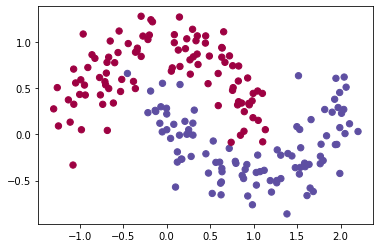

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

%matplotlib inline
np.random.seed(0)

# funkcja, która używając wyuczonego modelu wyznaczy przynależność do odpowiedniej klasy każdego piksela na obrazku z osobna
def plot_boundary(pred_func):
    x_min, x_max = X[0,:].min() - .5, X[0,:].max() + .5
    y_min, y_max = X[1,:].min() - .5, X[1,:].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.Spectral)

X, y = sklearn.datasets.make_moons(200, noise=0.17)
X = X.T
y = y.T
plt.scatter(X[0,:], X[1,:], s=40, c=y, cmap=plt.cm.Spectral)

# Uczenie sieci

Poniższe 49 linijek to pełna implementacja dwuwarstwowej sieci neuronowej.
Mamy tu zarówno losową inicjalizację parametrów (linijki 17 - 20), przewidywanie wyjścia generowanego dla zbioru treningowego z użyciem dwuwarstwowej sieci takiej jak na wyżej pokazanym rysunku architektury (linijki 27-30), a także wyznaczanie błędu i wyznaczanie poprawek wag sieci (linijki 33 - 45). Uruchom kod i sprawdź jak nasza sieć się uczy!


Poniższy kod wykorzystuje dodatkowy trik, który zawdzięczamy operacjom na macierzach. W poprzednich zadaniach na wejściu równań opisujących sieć umieszczaliśmy wektor kolumnowy $\vec{x}$, który opisywał cechy pojedynczego obiektu. 

Jeśli jednak podmienimy wektor cech pojdenczego obiektu $\vec{x}$ macierzą $X$, opisującą wspólnie wszystkie obiekty w zbiorze treningowym (gdzie cechy obiektów treningowych zapisane są w wierszach). To okaże się, że wspomniane wzory nadal będą działać, a obliczonym wyjściem sieci będzie macierz, która w kolejnych kolumnach będzie opisywać ocenę kolejnych przykładów uczących, zapisując w wierszach prawdopodobieństwo przydziału do klas!

$Z1 = W1 \cdot X + \vec{b_h}$ :: Z1 to macierz zagregowanych wejść w warstwie ukrytej wymiaru [n,m], gdzie n (wiersze) to liczba neuronów ukrytych, a m (kolumny) - kolejne przypadki uczące

$A1 = tanh(Z1)$ :: A1 to macierz Z1 przetransformowana funkcją aktywacji

$Z2 = W2 \cdot A1 + \vec{b_o}$ :: analogicznie do wzoru na Z1

$A2 = softmax(Z2)$ :: wygeneruj prawdopodobieństwa przydziału do klas poszczególnych przykładów uczących. Macierz A2 jest wymiarów [k, m], gdzie k (wiersze), to liczba neuronów wyjściowych, a m - (kolumny) to kolejne przypadki uczące.

**Zmieniając wartość parametru nn_hdmi w funkcji build_model możesz zaobserwować jak zmiana ilości neuronów w warstwie ukrytej wpływa na wygląd hiperpłaszczyzny separującej klasy.**

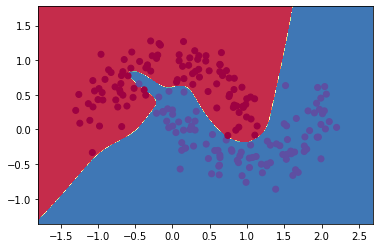

In [17]:
num_examples = len(X.T) # Ile przykładów w zbiorze uczącycm
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

learning_rate = 0.01 # stała uczenia

def predict_class(model, x):
    z1 = model['W1'].dot(x) + model['b1']
    a1 = np.tanh(z1)
    z2 = model['W2'].dot(a1) + model['b2']
    softmax_probs = np.exp(z2) / np.sum(np.exp(z2), axis=0, keepdims=True)
    
    return np.argmax(softmax_probs, axis=0)

def build_model(nn_hdim, iterations=20000):
    np.random.seed(0)
    W1 = np.random.randn(nn_hdim, nn_input_dim)  # losowa macierz wag miedzy warstwą wejściową a ukrytą
    b1 = np.zeros((nn_hdim, 1))                  # wektor biasów na warstwie ukrytej
    W2 = np.random.randn(nn_output_dim, nn_hdim) # losowa macierz wag między warstwą ukrytą a wyjściową
    b2 = np.zeros((nn_output_dim, 1))            # wektor biasów na warstwie wyjściowej
    
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    #Iteracyjnie poprawiaj wagi, które wylosowaliśmy powyżej
    for i in range(0, iterations):
        # Wyznaczenie wyjścia sieci dla wszystkich obiektów    
        z1 = model['W1'].dot(X) + model['b1']
        a1 = np.tanh(z1)                                  # wartości w neuronach warstwy ukrytej 
        z2 = model['W2'].dot(a1) + model['b2']
        softmax_probs = np.exp(z2) / np.sum(np.exp(z2), axis=0, keepdims=True) # wartości w neuronach warstwy wyjściowej
        
        # Propagacja wsteczna błędów, wyznaczenie poprawek wag
        delta3 = softmax_probs
        delta3[y,range(num_examples)] -= 1
        dW2 = delta3.dot(a1.T)                            # oblicz poprawkę macierzy wag między warstwą ukrytą a wyjściową
        db2 = np.sum(delta3, axis=1, keepdims=True)       # oblicz poprawkę wektora biasu w warstwie wyjściowej
        delta2 = W2.T.dot(delta3) * (1 - np.power(a1, 2))
        dW1 = np.dot(delta2, X.T)                         # oblicz poprawkę macierzy wag między wejściem a warstwą ukrytą
        db1 = np.sum(delta2, axis=1, keepdims=True)       # oblicz poprawkę wektora biasu w warstwie ukrytej
    
        # Zaktualizowanie wag
        model['W1'] += -learning_rate * dW1 # popraw macierz wag między warstwą wejściową a ukrytą
        model['b1'] += -learning_rate * db1 # popraw wektor biasów w warstwie ukrytej
        model['W2'] += -learning_rate * dW2 # popraw macierz wag między warstwą ukrytą a wyjściową
        model['b2'] += -learning_rate * db2 # popraw wektor biasów w warstwie wyjściowej
    return model

model = build_model(16)  # Wyznacz najlepszy zbiór parametrów
plot_boundary(lambda x: predict_class(model, x)) # Wyrysuj wyuczoną granicę decyzyjną

# Ile parametrów podlega uczeniu?:
<span style="color:red">**Zadanie 4 (1.25 punktu)**: Na przykładzie dotychczas analizowanej architektury sieci, w której na wejściu są 2 cechy, w jedynej warstwie ukrytej 3 neurony, a na wyjściu 2 neurony - oblicz, ile łącznie parametrów podlega poprawie w procesie uczenia.</span> (Cała macierz to nie jest jeden parametr!)

In [ ]:
# 6 wag warstw 1->2, 3 biasy warstwy 2, 6 wag warstw 2->3, 2 biasy warstwy 3
# Łącznie: 6+3+6+2 = 17

# Jak używać sieci bez tych wszystkich obliczeń?
Oczywiście, w codziennym użyciu nie wykonujemy ręcznie całego procesu uczenia. To laboratorium ma uświadomić jak sieci działają na "niskim poziomie" tak, aby łatwiej było zrozumieć kolejne zajęcia. W praktycznych problemach używa się już gotowych implementacji, np. z użyciem klasy MLPClassifier z biblioteki sklearn.